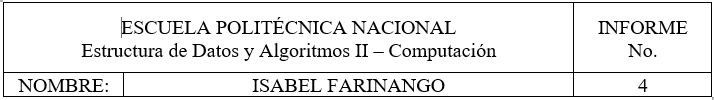

# ***EJERCICIOS GRAFOS***

***1. OBJETIVOS***

* 

***2. INTRODUCCIÓN***



***3. PROBLEMAS PLANTEADOS Y SOLUCIÓN***

Para los dos ejercicios a continuación crea programas en Python utilizando JupyterLab, en lo posible usa funciones, listas, diccionarios, declaraciones de control de decisión y de repetición:_

_3.1 Te estás preparando para el fin del semestre y haces una lista de tipo “TO-DOs” para preparar todas las actividades, como por ejemplo: “Proyecto Final EDA2”, “Examen SO”, “Examen ArquitecturaC”, “Presentación Informe BDD Distribuidas”, etc. Has un programa que barra la lista de actividad en actividad y tú puedas indicar si está listo o no (check o no). Si hay una actividad con “check”, que ya no se muestre la próxima vez que revisas tu lista de TO-DOs_    

_3.2 Cada mes tu empresa hace pagos de salarios de los trabajadores. Puedes ingresar los elementos quemados en un diccionario {mes:pago}. Haz un programa que permita verificar en qué mes se pagó más y el valor, en qué mes se pagó menos y el valor, y finalmente el promedio de pago de salarios en el año._

_3.3 Dado el siguiente grafo, implemente el algortimo BSF donde se responda a las preguntas:_

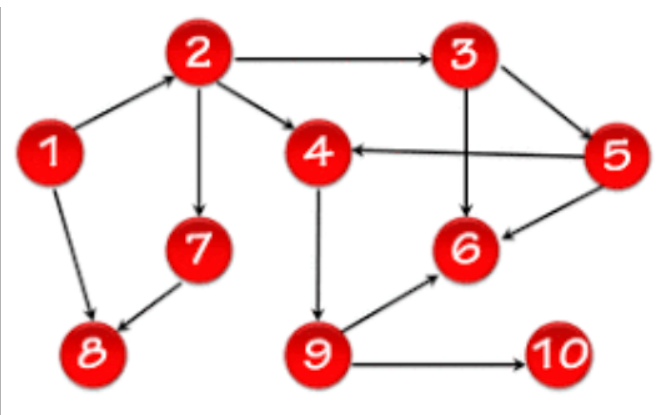

    a. Existe un path desde 1 hasta 6?

    b. Cuál es la ruta más corta?

    c. Dibuje el árbol BFS

_3.4 Genera el árbol BFS (BFS Tree) para el siguiente grafo G, sabiendo que el nodo de inicio es 0. Ese sería el componente conectado que contiene al nodo 0. Implementa el algoritmo BFS y usa las estructuras auxiliares necesarias._

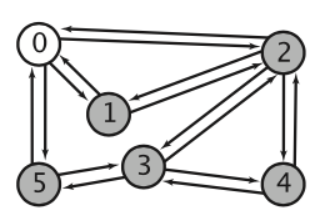 

***4. CONCLUSIONES***



***5. REFERENCIAS BIBLIOGRÁFICAS***



***6. DECLARACIÓN DE USO DE IA Y PROMPTS*** 

*6.1	Herramienta utilizada:* 

*6.2	Propósito del uso:* 

*6.3	Prompts o instrucciones proporcionadas:*

   
  
    



*6.4	Uso del contenido generado:* 

*6.5	Revisión y edición:* 

*6.6	Limitaciones y consideraciones éticas:* 


**Fecha de entrega** 29/10/2025